# Quickstart: Survey

learn how to generate a survey

In [1]:
from skysurvey import survey

/Users/rigault/miniforge3/lib/python3.9/site-packages/ztfquery-1.19.1-py3.9.egg/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


let's start with two predefined survey. A generic HealpixSurvey (based on healpix sky segmentation) 
and a real one ZTF (based on polygon sky segmentation)

### Healpix Survey

In [2]:
hpsurvey = survey.HealpixSurvey(9)

Let's draw the equivalent of 4 years of observations assuming 1000 healpix pixel pointings per day

Remark that, as such mjd_range and size are drawn independenly so, 1000 pointing per day is an average. 

In [3]:
%%time
hpsurvey.draw_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     ra_range=[-30,90], 
                    inplace=True)  # set the self.data and do not return a new HealpixSurvey

CPU times: user 1.46 s, sys: 222 ms, total: 1.69 s
Wall time: 1.69 s


Remark: you could have load it directly this way using the ``from_random`` classmethod

In [4]:
%%time
hpsurvey = survey.HealpixSurvey.from_random(nside=9, 
                                     size=365*4*1000, # number of observation 
                                     bands=["ztf:g","ztf:r","ztf:i"],
                                     mjd_range=[56000, 56000+365*4], 
                                     skynoise_range=[180,210], 
                                     ra_range=[-30,90])

CPU times: user 1.6 s, sys: 165 ms, total: 1.77 s
Wall time: 1.77 s


In [5]:
hpsurvey.data # Show the data generated. time, band sky noise, gain, zp and fieldid.

,index,mjd,band,skynoise,gain,zp,fieldid
0,1204851,56000.000482,ztf:i,200.368636,1.0,25.0,558
1,502089,56000.001237,ztf:g,189.830118,1.0,25.0,432
2,782278,56000.003051,ztf:r,203.177772,1.0,25.0,201
3,571834,56000.004849,ztf:i,196.402707,1.0,25.0,243
4,251007,56000.005039,ztf:g,209.766236,1.0,25.0,344
...,...,...,...,...,...,...,...
1459995,314794,57459.996481,ztf:i,207.382923,1.0,25.0,641
1459996,1030355,57459.997576,ztf:i,185.046363,1.0,25.0,507
1459997,68383,57459.998672,ztf:g,194.275565,1.0,25.0,541
1459998,1081974,57459.999427,ztf:r,198.539872,1.0,25.0,360


Let's get the number of time a 'field' has been observed

In [6]:
hpsurvey.get_fieldstat("size") 

13     2189
610    2158
316    2155
558    2136
147    2134
       ... 
245    1924
480    1922
307    1922
41     1921
396    1915
Name: fieldid, Length: 720, dtype: int64

These are just short cut to pandas dataframe contained in self.data

So you can play.

Let's measure the number of observation we have per day and per band

In [7]:
data = hpsurvey.data.copy()
data["day"] = data["mjd"].astype(int)

In [8]:
dailybands = data.groupby(["day","band"]).size()
dailybands

day    band 
56000  ztf:g    327
       ztf:i    325
       ztf:r    360
56001  ztf:g    328
       ztf:i    342
               ... 
57458  ztf:i    367
       ztf:r    345
57459  ztf:g    315
       ztf:i    319
       ztf:r    324
Length: 4380, dtype: int64

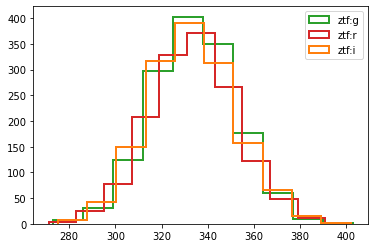

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()

prop = dict(lw=2, histtype="step")
ax.hist(dailybands.xs("ztf:g", level=1), color="tab:green", label="ztf:g", **prop) 
ax.hist(dailybands.xs("ztf:r", level=1), color="tab:red", label="ztf:r",**prop)
ax.hist(dailybands.xs("ztf:i", level=1), color="tab:orange", label="ztf:i",**prop)
ax.legend(loc='best')

#### Get the field of a target

This is an important feature that enable us to know whic field contains which target

In [10]:
hpsurvey.radec_to_fieldid(40, 90)

189

In [11]:
import numpy as np
# remark that, doing that this way, it won't be homogeneous.
ra_flat = np.random.uniform(-30, 90, 1000)
dec_flat = np.random.uniform(0, 360, 1000)
hpsurvey.radec_to_fieldid(ra_flat, dec_flat)

array([155, 327,  37, 324,   6, 336,  10, 574,  34, 470, 265,  27, 413,
       679, 462, 687,  34, 277, 431,  33,  40, 670,  11, 114, 505,  75,
        11,  18,   0,   2, 727, 627, 437,  19, 180, 510, 489,  15,  77,
       642, 450, 643, 271,  42, 416, 553, 381, 104,  15, 705, 528, 234,
       404, 220, 690,   5, 400,   9, 581, 412, 183, 546, 326,  85,  15,
       418, 215, 652,  37, 534, 139, 302, 501, 592,   8, 226,   1, 657,
       316, 273,   2, 409, 257, 658, 104, 583,  25, 103,  38, 280, 372,
       198, 315, 298, 394,  97, 521,  50, 509, 103,  11, 236, 622, 166,
        74, 429, 452,  14, 252, 219, 415, 397,   0, 662, 211, 418,  17,
       554, 134, 115, 412, 240,   2, 399, 296, 701,  94, 156, 147, 245,
       108,   3, 253, 355,  21, 534, 617, 226, 193, 199,  89,  57,  76,
       100,   3, 686,   0, 164, 736,  50,  15,  50, 518, 463, 376, 691,
       345,  15, 134, 665, 247, 716,  87, 408,   1, 687,  47, 661, 175,
         1, 633,  15, 606, 153, 254, 181, 456,   1,   0,   3, 28

### ZTF, a polygon survey

polygon survey are surveys which pointings are defined by a (potentially very long) list of fieldid. (see self.

In [12]:
from skysurvey.survey import ZTF

random is using the real ZTF field definition, but enables you to generate a random draw (unrealistic) as for HealpixSurvey

In [13]:
%%time
ztf = ZTF.from_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     )

CPU times: user 1.51 s, sys: 64.3 ms, total: 1.57 s
Wall time: 1.57 s


If you have a list of observation have these data. load directly a ztf instance with that

In [14]:
%%time
other_ztf = ZTF(data=data)

CPU times: user 15.9 ms, sys: 1.91 ms, total: 17.8 ms
Wall time: 16.4 ms


In [15]:
other_ztf.get_fieldstat("size")

13     2189
610    2158
316    2155
558    2136
147    2134
       ... 
245    1924
480    1922
307    1922
41     1921
396    1915
Name: fieldid, Length: 720, dtype: int64

**Next let's join targets and survey**